# Proyecto 4

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

Este proyecto es una continuación de: [Proyecto 3 - Series de Tiempo](https://github.com/andreavillaq/Proyecto3-Series-de-Tiempo.git) donde previamente exploramos el dataset e hicimos algunos modelos de Machine Learning. En esta iteración, continuaremos la exploración de datos y probaremos nuevos modelos de Machine Learning.

Nuestro objetivo para esta iteración es encontrar un mejor modelo de predicción para hacer pronósticos para el último trimestre del 2019 y el primer trimestre del 2020 (trimestre previo a la pandemia). Además, exploraremos como la pandemia afecto el flujo de autos en el año 2020.

## 1. Preparación del Dataset

Empezamos por importar algunas de las librerías que vamos a necesitar para importar, preparar y explorar el dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import datetime
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline

import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [2]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

Empezamos analizando un poco el dataset 2020 para evaluar si podemos añadirlo a nuestro al dataset que usamos en el proyecto 3, que sólo incluía los años 2017,2018 y 2019.

In [3]:
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [4]:
print(data_2020['estacion'].unique())
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [5]:
print(data_2020['sentido'].unique())
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [6]:
print(data_2020['tipo_vehiculo'].unique())
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago Doble Auto'
 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago doble Moto'
 'Pesados 2 Ejes' 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes'
 'Pesados 6 Ejes']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [7]:
print(data_2020['forma_pago'].unique())
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


Vemos que el 2020 tiene varias diferencias pero mantienen en común lo siguiente:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente en 2020 con respecto a los otros años

**tipo_vehiculo**: Liviano o Pesado, en 2020 vemos más categorías que intuimos que entrarían dentro de estas dos categorías según lo establezca las leyes de tránsito argentino.

**forma_pago**: Hay varias y varian entre los años. En 2020, vemos la forma de pago TAG que es lo mismo que el telepase.

**cantidad_pasos**: Cantidad de vehiculos

Analizamos 2017,2018 y 2019 como habíamos hecho previamente en el proyecto 3 ya que usaremos este dataset así como también usaremos un dataset que incluya el 2020.

In [8]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [9]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [10]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [11]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [12]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable ya que tal como está el dataset por hora es díficil de interpretar
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


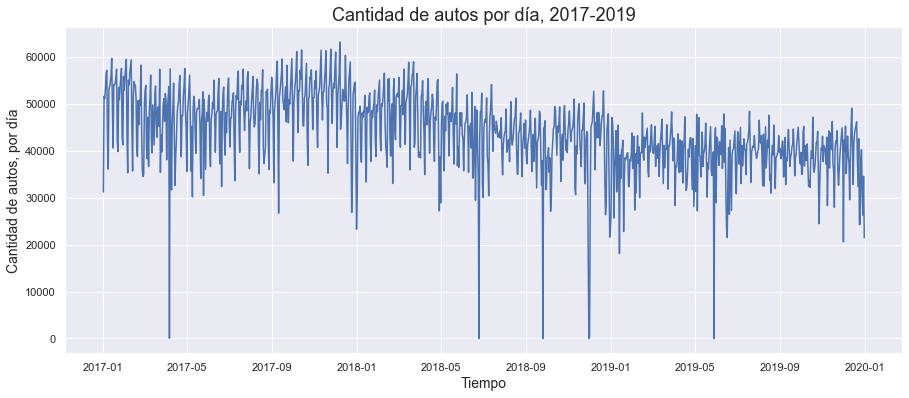

In [13]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.title('Cantidad de autos por día, 2017-2019', fontsize=18)
plt.xlabel('Tiempo', fontsize = 14)
plt.ylabel('Cantidad de autos, por día', fontsize = 14)
plt.show()

Ahora que lo hemos resampleado por día, es más facil de interpretar y podemos ver unas fuertes caídas de los autos que pasan por la estación de peaje Illia que pagan en efectivo. Sabemos que estos días fueron atípicos porque incluyen paros e incluso eventos como el G20, pot tanto, procedemos a tratar estos outliers.

In [14]:
#observamos aquellos valores menores a 15mil pasos 
diario_out=diario[diario.cantidad_pasos <=15000]
diario_out

,cantidad_pasos
fecha,
2017-04-06,40
2018-06-25,0
2018-09-25,0
2018-11-30,0
2018-12-01,350
2019-05-29,0


In [15]:
diario.cantidad_pasos[diario.cantidad_pasos <=15000] = np.nan

In [16]:
#interpolamos estos valores
print(diario.isna().sum())
diario = diario.interpolate(method='nearest', k=1)
print(diario.isna().sum())

cantidad_pasos    6
dtype: int64
cantidad_pasos    0
dtype: int64


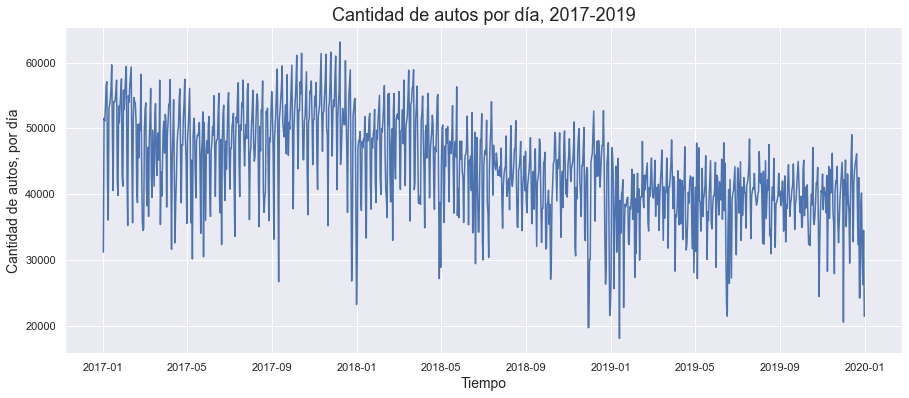

In [17]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.title('Cantidad de autos por día, 2017-2019', fontsize=18)
plt.xlabel('Tiempo', fontsize= 14)
plt.ylabel('Cantidad de autos, por día', fontsize= 14)
plt.show()

Podemos ver la mejora del dataset una vez que hemos filtrado los outliers. Ahora que hemos tratado los outliers, vamos a evaluar el dataset semanalmente ya que si bien a diario podemos entenderlo más facilmente que en su forma original, analizarlo en semanas puede simplificar nuestro análisis ya que manejaremos menos cantidad de datos.

In [18]:
#Resampleamos nuestros datos para agrupar por la media semanal
semanal_media = diario.resample('W').mean()
print(semanal_media.shape)
semanal_media.head()

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183.000000
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571


In [19]:
semanal_media.tail()

,cantidad_pasos
fecha,
2019-12-08,40413.000000
2019-12-15,38994.285714
2019-12-22,41840.142857
2019-12-29,32341.428571
2020-01-05,27985.000000


Observamos que tenemos una semana del 2020, en vista de que vamos a concatenar este Dataset con datos del 2020 vamos a eliminar la observacion del 2020 ahora para evitar doble conteo.

In [20]:
semanal_media = semanal_media[(semanal_media.index <= '2019-12-29')]
semanal_media.tail()

,cantidad_pasos
fecha,
2019-12-01,38079.285714
2019-12-08,40413.000000
2019-12-15,38994.285714
2019-12-22,41840.142857
2019-12-29,32341.428571


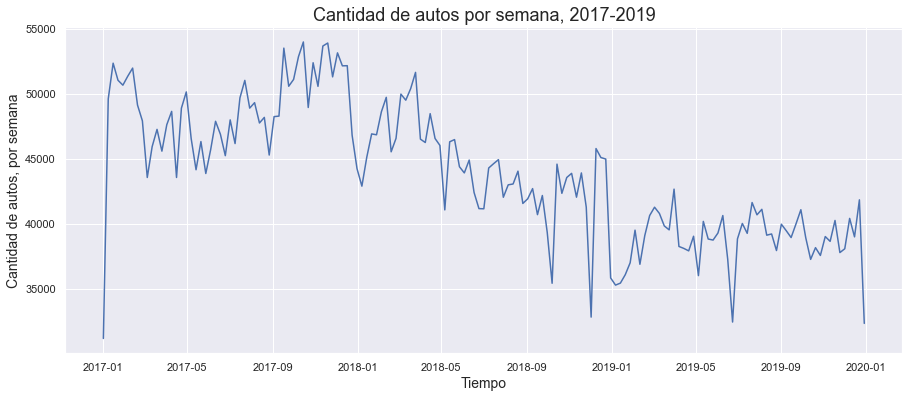

In [21]:
plt.figure(figsize = (15,6))
plt.plot(semanal_media.index, semanal_media.cantidad_pasos)
plt.title('Cantidad de autos por semana, 2017-2019', fontsize=18)
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Cantidad de autos, por semana',fontsize=14)
plt.show()

Podemos ver que la data inicia recuperándose de una caída, esto se debe a que la primera semana está incompleta en cuanto a los datos. Por tanto, vamos a filtrar estas semana.

In [22]:
semanal_media.cantidad_pasos[semanal_media.cantidad_pasos <=31500] = np.nan
print(semanal_media.isna().sum())

cantidad_pasos    1
dtype: int64


In [23]:
semanal_media = semanal_media.interpolate(limit_direction='both')
print(semanal_media.isna().sum())

cantidad_pasos    0
dtype: int64


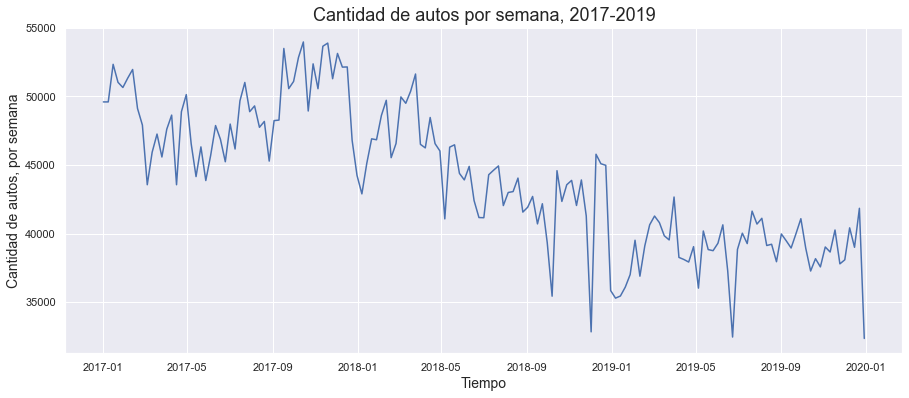

In [24]:
plt.figure(figsize = (15,6))
plt.plot(semanal_media.index, semanal_media.cantidad_pasos)
plt.title('Cantidad de autos por semana, 2017-2019', fontsize=18)
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Cantidad de autos, por semana',fontsize=14)
plt.show()

Profundizamos nuestro análisis del año 2020 evaluando las formas de pago más usadas para la estación Illia y para todas las estaciones

In [25]:
illia_2020 = data_2020[data_2020.estacion=='ILLIA']
illia_2020['forma_pago'].value_counts()

Tag                  135838
Efectivo              52374
Violación             37272
Rec.Deuda             30694
Exento                23745
Tarjeta Magnética     10899
CPP                    2913
Mercado Pago           2318
Name: forma_pago, dtype: int64

In [26]:
data_2020['forma_pago'].value_counts()

Tag                  1429726
Violación             424291
Efectivo              264083
Rec.Deuda             187388
Exento                149718
Tarjeta Magnética      50495
CPP                    17379
Mercado Pago           10663
Name: forma_pago, dtype: int64

Podemos observar que tanto en la estación Illia como en el resto de las estaciones el telepase fue la forma de pago más utilizada, a pesar de la pandemia, es un comportamiento que ya veníamos observando desde 2019

Creamos un dataset para el año 2020 que solo contenga la estaciónIllia y la forma de pago efectivo tal cómo nuestro dataset de 2017-2019

In [27]:
dataset_2020=data_2020[(data_2020.estacion=='ILLIA')& (data_2020.forma_pago == 'Efectivo')]
dataset_2020

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
52,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ILLIA,Auto,Efectivo,Efectivo,Centro,326.0
53,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ILLIA,Auto,Efectivo,Efectivo,Provincia,319.0
134,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,1.0,2.0,ILLIA,Auto,Efectivo,Efectivo,Centro,199.0
135,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,1.0,2.0,ILLIA,Auto,Efectivo,Efectivo,Provincia,180.0
202,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,2.0,3.0,ILLIA,Auto,Efectivo,Efectivo,Centro,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532216,2020.0,2020-12-24,diciembre,Jueves,24.0,11.0,12.0,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,1.0
2532227,2020.0,2020-12-24,diciembre,Jueves,24.0,12.0,13.0,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,1.0
2532271,2020.0,2020-12-24,diciembre,Jueves,24.0,17.0,18.0,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Centro,1.0
2532928,2020.0,2020-12-28,diciembre,Lunes,28.0,12.0,13.0,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,1.0


In [28]:
#Quitamos las columnas que no vamos a utilizar
dataset_2020.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_2020['fecha2'] = pd.to_datetime(dataset_2020.fecha) + pd.to_timedelta(dataset_2020.hora_fin, unit = 'h')
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_2020.drop(columns=['fecha','hora_fin','dia_fecha'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
dataset_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el d_2020 por fecha
dataset_2020.sort_values('fecha', inplace = True)
dataset_2020.reset_index(drop=True, inplace = True)

In [29]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_2020 = dataset_2020.resample('D', on = 'fecha').sum()
diario_2020

,cantidad_pasos
fecha,
2020-01-01,21395.0
2020-01-02,33722.0
2020-01-03,37067.0
2020-01-04,30627.0
2020-01-05,27812.0
...,...
2020-12-27,8434.0
2020-12-28,10311.0
2020-12-29,12036.0


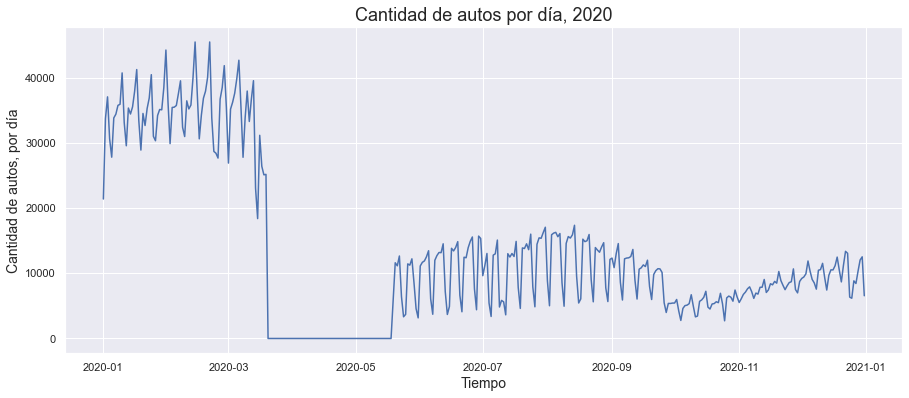

In [30]:
plt.figure(figsize = (15,6))
plt.plot(diario_2020.index, diario_2020.cantidad_pasos)
plt.title('Cantidad de autos por día, 2020', fontsize=18)
plt.xlabel('Tiempo', fontsize = 14)
plt.ylabel('Cantidad de autos, por día', fontsize = 14)
plt.show()

In [31]:
diario_2020.isna().sum()

cantidad_pasos    0
dtype: int64

Vemos que una fuerte caída del pase de autos por la estación Illia hasta llegar a cero desde finales de marzo hasta mediados de mayo, no tenemos datos faltantes pero de igual forma este comportamiento tiene sentido considerando que Argentina entro en fase 1 (cuarentena estricta) desde el 20 de marzo de 2020. Además, vemos como normal que a pesar de que el uso de efectivo se recupero un poco se mantenga a niveles más bajos que previo a la pandemia ya que el uso de efectivo ha sido desincentivado para evitar la transmisión del virus.

In [32]:
#Resampleamos nuestros datos para agrupar por la media semanal
semanal_media_2020 = diario_2020.resample('W').mean()
print(semanal_media_2020.shape)
semanal_media_2020

(53, 1)


,cantidad_pasos
fecha,
2020-01-05,30124.600000
2020-01-12,34765.571429
2020-01-19,35259.714286
2020-01-26,34456.000000
2020-02-02,36190.714286
2020-02-09,35306.428571
2020-02-16,37351.142857
2020-02-23,36728.000000
2020-03-01,33641.000000


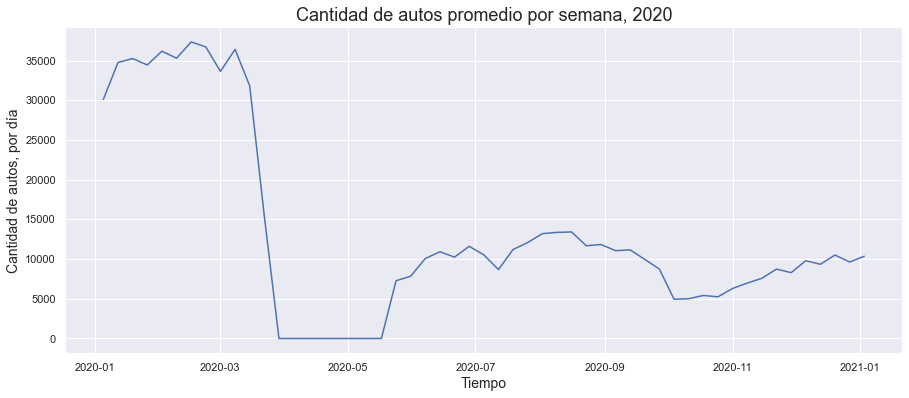

In [33]:
plt.figure(figsize = (15,6))
plt.plot(semanal_media_2020.index, semanal_media_2020.cantidad_pasos)
plt.title('Cantidad de autos promedio por semana, 2020', fontsize=18)
plt.xlabel('Tiempo', fontsize = 14)
plt.ylabel('Cantidad de autos, por día', fontsize = 14)
plt.show()

Ahora que tenemos nuestro dataset 2020 en la misma medida, concatenamos con nuestro dataset del 2017-2019

In [34]:
semanal_media_c2020 = pd.concat([semanal_media, semanal_media_2020])
semanal_media_c2020

,cantidad_pasos
fecha,
2017-01-01,49601.714286
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571
...,...
2020-12-06,9797.142857
2020-12-13,9347.857143
2020-12-20,10511.142857


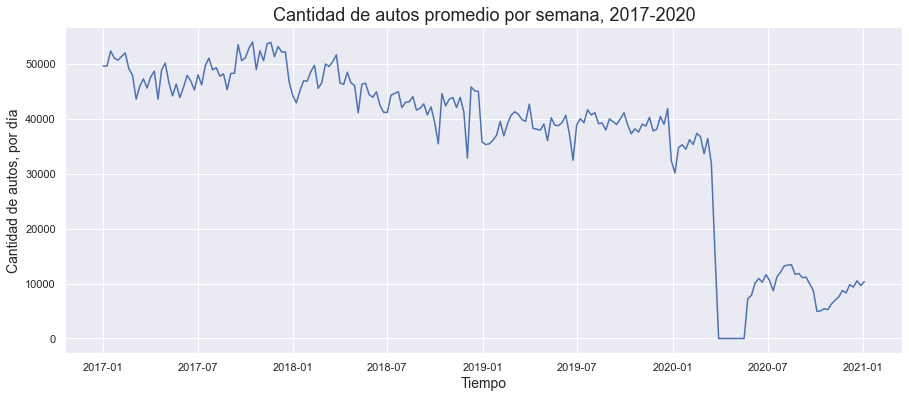

In [35]:
plt.figure(figsize = (15,6))
plt.plot(semanal_media_c2020.index, semanal_media_c2020.cantidad_pasos)
plt.title('Cantidad de autos promedio por semana, 2017-2020', fontsize=18)
plt.xlabel('Tiempo', fontsize = 14)
plt.ylabel('Cantidad de autos, por día', fontsize = 14)
plt.show()

Como sabemos que a partir de la semana del 22 de mayo de 2020 tenemos los efectos de la pandemia y que usando los datos observados del 2017-2019 no vamos a poder predecir el comportamiento irregular del tránsito a partir de esa fecha, vamos a predecir sólo sobre nuestro primer trimestre del 2020

In [36]:
semanal_media_c2020 = semanal_media_c2020[(semanal_media_c2020.index <='2020-03-15')]
semanal_media_c2020

,cantidad_pasos
fecha,
2017-01-01,49601.714286
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571
...,...
2020-02-16,37351.142857
2020-02-23,36728.000000
2020-03-01,33641.000000


## 2. Modelos de Machine Learning

Vamos a utilizar como métrica de error el error cuadrático medio (MSE) ya que mide el promedio de errores al cuadrado de un estimador, es decir, el promedio de la diferencia al cuadrado entre los valores estimados y lo que está siendo estimado. Mientras más pequeño sea el MSE es más precisa nuestra predicción

Usaremos un modelo SARIMA, que ya exploramos previamente en el proyecto 3, y servirá como nuestro modelo ***Benchmark***. Además, vamos a explorar dos nuevos modelos: Prophet y LSTM para predecir el último trimestre del 2019 y el primer trimestre del 2020.

## 2.1. SARIMA

### 2.1.1. Último Trimestre 2019

In [37]:
import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [38]:
y=semanal_media
y.head()

,cantidad_pasos
fecha,
2017-01-01,49601.714286
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571


In [39]:
y['2019':]

,cantidad_pasos
fecha,
2019-01-06,35284.857143
2019-01-13,35439.571429
2019-01-20,36088.142857
2019-01-27,37002.714286
2019-02-03,39509.714286
2019-02-10,36886.285714
2019-02-17,39094.857143
2019-02-24,40634.142857
2019-03-03,41274.142857


In [40]:
d=range(1,2) #diferenciamos la serie 1 vez dado que como vimos tiene tendencia, es decir, es no estacionaria
p=q=range(8,17)
pdq=list(itertools.product (p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12)
              for x in list(itertools.product (p,d,q)) ]
print('Ejemplos de combinaciones de parametros para SARIMAX ....')
print('SARIMAX:{} x{}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x{}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{} x{}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{} x{}'.format(pdq[2],seasonal_pdq[4]))

Ejemplos de combinaciones de parametros para SARIMAX ....
SARIMAX:(8, 1, 9) x(8, 1, 9, 12)
SARIMAX:(8, 1, 9) x(8, 1, 10, 12)
SARIMAX:(8, 1, 10) x(8, 1, 11, 12)
SARIMAX:(8, 1, 10) x(8, 1, 12, 12)


In [41]:
 mod = sm.tsa.statespace.SARIMAX(y,
                                order=(10, 1, 10),
                                seasonal_order=(10, 1, 10, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2662     54.017     -0.005      0.996    -106.137     105.605
ar.L2         -0.2756     60.819     -0.005      0.996    -119.478     118.927
ar.L3         -0.2991     78.519     -0.004      0.997    -154.193     153.595
ar.L4         -0.2538     48.384     -0.005      0.996     -95.085      94.578
ar.L5          0.2155     56.228      0.004      0.997    -109.988     110.419
ar.L6         -0.2499     95.291     -0.003      0.998    -187.017     186.517
ar.L7         -0.4780     54.120     -0.009      0.993    -106.551     105.595
ar.L8          0.3830     54.155      0.007      0.994    -105.759     106.525
ar.L9          0.3729    135.902      0.003      0.998    -265.990     266.735
ar.L10        -0.0699    107.899     -0.001      0.999    -211.549     211.409
ma.L1         -0.0893     61.840     -0.001      0.9

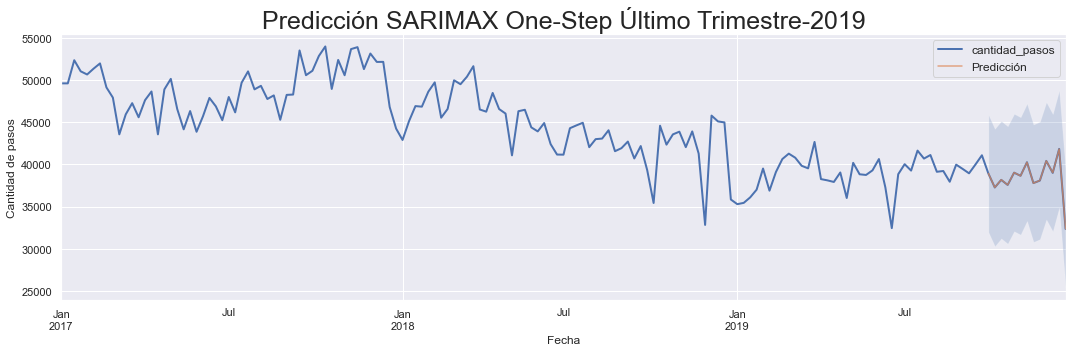

In [42]:
pred = results.get_prediction(start=datetime.datetime(2019,10,6), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='Serie Observada',lw = 2,figsize=(15,5))

pred.predicted_mean.plot(ax=ax, label='Predicción', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], alpha=.2)
plt.title("Predicción SARIMAX One-Step Último Trimestre-2019", fontsize=25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de pasos')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

RMSE de SARIMAX One-Step es: 13.481888421685225


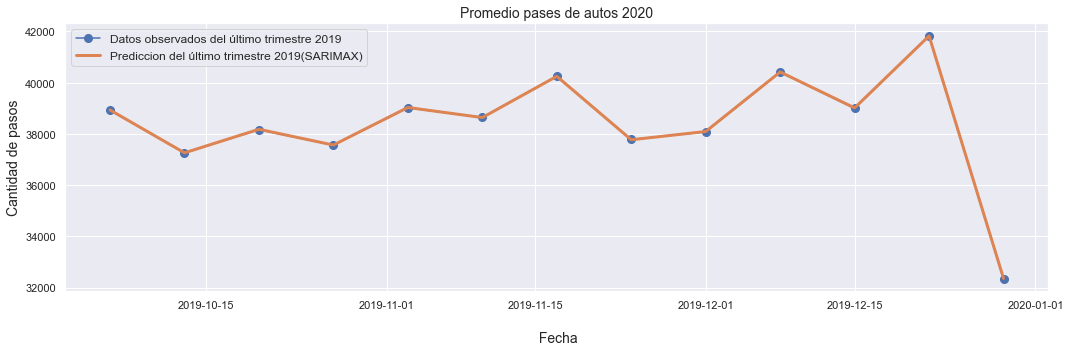

In [43]:
y_predicha = pred.predicted_mean
y_observada = y['2019-10-06':]


rmse_sarima = np.sqrt(mean_squared_error(y_observada,y_predicha))
print(f'RMSE de SARIMAX One-Step es: {rmse_sarima}')

plt.figure(figsize=(15,5))
plt.plot(y_observada.index, y_observada.cantidad_pasos, marker='o', markersize=8, label='Datos observados del último trimestre 2019')
plt.plot(y_predicha.index, y_predicha, lw=3, label='Prediccion del último trimestre 2019(SARIMAX)')
plt.title ('Promedio pases de autos 2020', fontsize=14)
plt.xlabel('\n Fecha',fontsize=14)
plt.ylabel('Cantidad de pasos',fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

### 2.1.2. Primer Trimestre del 2020

In [44]:
y_2020 = semanal_media_c2020[(semanal_media_c2020.index > "2019-12-29") & (semanal_media_c2020.index <= "2020-03-15")]
y_2020

,cantidad_pasos
fecha,
2020-01-05,30124.600000
2020-01-12,34765.571429
2020-01-19,35259.714286
2020-01-26,34456.000000
2020-02-02,36190.714286
2020-02-09,35306.428571
2020-02-16,37351.142857
2020-02-23,36728.000000
2020-03-01,33641.000000


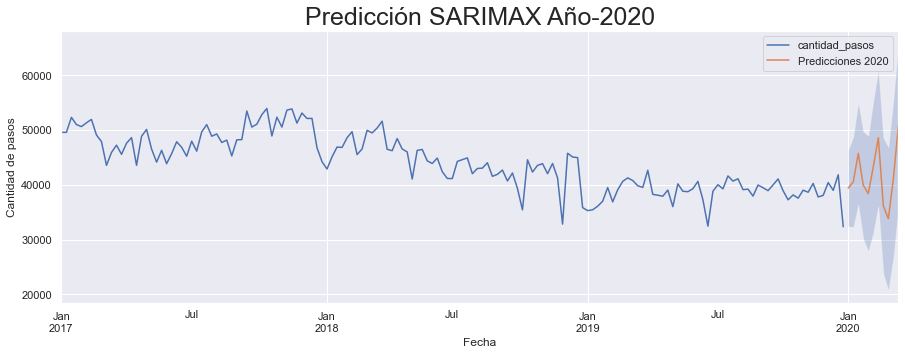

In [45]:
pred_uc = results.get_forecast(steps=datetime.datetime(2020,3,15))
pred_ci = pred_uc.conf_int()

ax = y.plot(label='Cantidad_pasos',figsize=(15,5))
pred_uc.predicted_mean.plot(ax=ax, label='Predicciones 2020')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], alpha=.25)
plt.title("Predicción SARIMAX Año-2020", fontsize=25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de pasos')

plt.legend()
plt.show()

** Tenemos una semana faltante que corresponde a la ultima semana del 2019 que hace que el gráfico se vea descontinuado

RMSE de SARIMAX One-Step es: 8723.334443499409


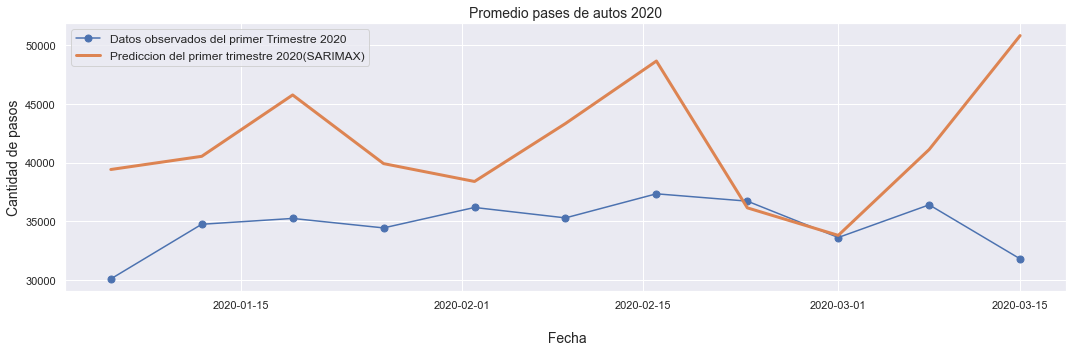

In [46]:
y_sarima_2020=pred_uc.predicted_mean

rmse_sarima20=np.sqrt(mean_squared_error(y_2020, y_sarima_2020))
print(f'RMSE de SARIMAX One-Step es: {rmse_sarima20}')

plt.figure(figsize=(15,5))
plt.plot(y_2020.index, y_2020.cantidad_pasos, marker='o', markersize=7, label='Datos observados del primer Trimestre 2020')
plt.plot(y_sarima_2020.index, y_sarima_2020, lw=3, label='Prediccion del primer trimestre 2020(SARIMAX)')
plt.title ('Promedio pases de autos 2020', fontsize=14)
plt.xlabel('\n Fecha',fontsize=14)
plt.ylabel('Cantidad de pasos',fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Observamos que a pesar de que el modelo SARIMA funcionó muy bien para el último trimestre del 2019, no funciona bien para predecir el primer trimestre del 2020 por lo que tenemos un error mucho más alto.

## 2.2. Prophet

Prophet es una librería ideada por Facebook para hacer pronósticos de series de tiempo sobre el modelo Aditivo. Es resistente a valores atípicos, datos faltantes y cambios drásticos en una serie temporal.

### 2.2.1. Último Trimestre 2019

In [47]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

In [48]:
semanal_media_1 = semanal_media.copy()
semanal_media_1.reset_index(level=0, inplace=True)
semanal_media_1= semanal_media_1.rename(columns={'fecha': 'ds',
                        'cantidad_pasos': 'y'})
semanal_media_1.head()

,ds,y
0,2017-01-01,49601.714286
1,2017-01-08,49601.714286
2,2017-01-15,52344.714286
3,2017-01-22,51030.714286
4,2017-01-29,50654.428571


In [49]:
semanal_m_train = semanal_media_1[semanal_media_1.ds < "2019-09-29"]
semanal_m_train.tail()

,ds,y
138,2019-08-25,37942.000000
139,2019-09-01,39967.857143
140,2019-09-08,39467.285714
141,2019-09-15,38941.714286
142,2019-09-22,39989.571429


In [50]:
semanal_m_pred = semanal_media_1[semanal_media_1.ds > "2019-09-29"]
semanal_m_pred = semanal_m_pred[semanal_m_pred.ds <= "2019-12-29"]
semanal_m_pred.head()

,ds,y
144,2019-10-06,38926.142857
145,2019-10-13,37262.857143
146,2019-10-20,38163.857143
147,2019-10-27,37564.285714
148,2019-11-03,39018.428571


In [51]:
semanal_model = Prophet(interval_width=0.95)
semanal_model.fit(semanal_m_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
semanal_forecast = semanal_model.make_future_dataframe(periods=14, freq='W')
semanal_forecast = semanal_model.predict(semanal_forecast)

In [53]:
forecast = semanal_model.predict(semanal_forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-01-01,47537.540184,43049.111218,51695.649740
1,2017-01-08,46378.776816,41635.817545,50766.997630
2,2017-01-15,47029.517921,42577.893171,51497.524787
3,2017-01-22,48628.033522,44245.418899,52899.528917
4,2017-01-29,49877.339299,45467.491273,54157.552461


<Figure size 1440x864 with 0 Axes>

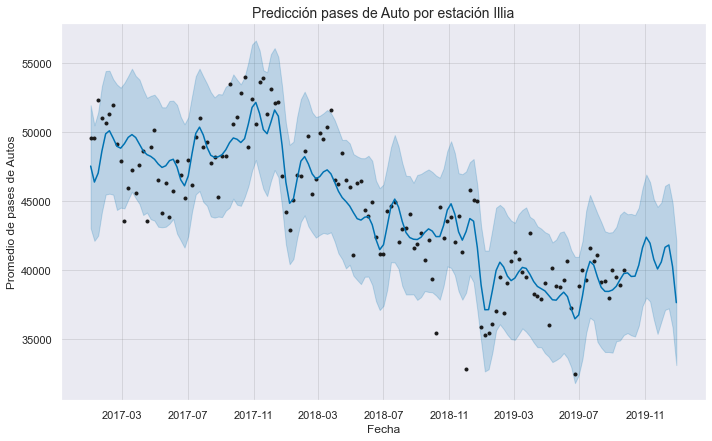

In [54]:
plt.figure(figsize=(20, 12))
semanal_model.plot(semanal_forecast, xlabel = 'Fecha', ylabel = 'Promedio de pases de Autos')
plt.title('Predicción pases de Auto por estación Illia', fontsize=14);

La línea azul indica la predicción, el sombreado alrededor nos indica el intervalo de confianza y los puntos negros representan los valores observados con los cuales entrenamos el modelo. Pasamos a descomponer esta predicción para ver su compotamiento.

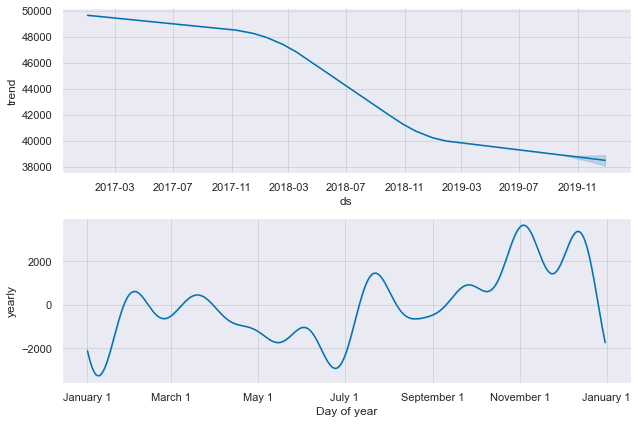

In [55]:
semanal_comp = semanal_model.plot_components(forecast)

Nuestros estimados mantienen la tendencia negativa general que vemos en el 2019 con el uso del efectivo. 

También podemos observar que noviembre sería el mes de mayor uso del efectivo mientras que enero es el de menos uso de efectivo para pagar el peaje.

In [56]:
semanal_pred_pro = forecast[(forecast.ds > "2019-09-29") & (forecast.ds <= "2019-12-29")]
semanal_pred_pro = semanal_pred_pro.drop(columns=["trend", "yhat_lower", "yhat_upper",
                       "trend_lower", "trend_upper", "additive_terms",
                       "additive_terms_lower", "additive_terms_upper",
                       "yearly", "yearly_lower", "yearly_upper", 
                       "multiplicative_terms", "multiplicative_terms_lower", 
                       "multiplicative_terms_upper"], axis = 1)
semanal_pred_pro.rename(columns={'ds':'fecha','yhat':'cantidad_pasos'}, inplace=True)
semanal_pred_pro = semanal_pred_pro.set_index('fecha')
semanal_pred_pro

,cantidad_pasos
fecha,
2019-10-06,39533.660403
2019-10-13,39554.318704
2019-10-20,40354.854995
2019-10-27,41626.164414
2019-11-03,42380.039658
2019-11-10,41943.258833
2019-11-17,40769.581154
2019-11-24,40078.906099
2019-12-01,40585.530008


In [57]:
semanal_obs = semanal_media[(semanal_media.index > "2019-09-29") & (semanal_media.index <= "2019-12-29")]
semanal_obs

,cantidad_pasos
fecha,
2019-10-06,38926.142857
2019-10-13,37262.857143
2019-10-20,38163.857143
2019-10-27,37564.285714
2019-11-03,39018.428571
2019-11-10,38648.000000
2019-11-17,40255.714286
2019-11-24,37785.714286
2019-12-01,38079.285714


RMSE en Prophet: 2786.1616848325298


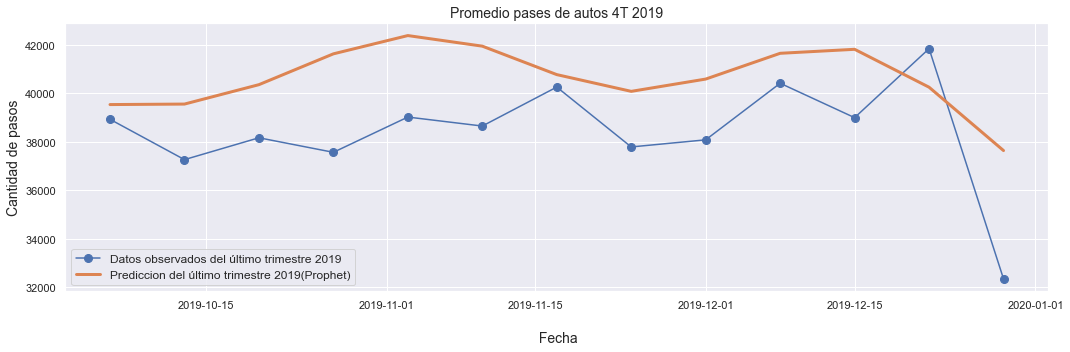

In [58]:
y_pred_prophet = semanal_pred_pro.cantidad_pasos 
y_obs = semanal_obs.cantidad_pasos
rmse_prophet = np.sqrt(mean_squared_error(y_obs,y_pred_prophet))
print(f'RMSE en Prophet: {rmse_prophet}')

plt.figure(figsize=(15,5))
plt.plot(semanal_obs.index, semanal_obs.cantidad_pasos, marker='o', markersize=8, label='Datos observados del último trimestre 2019')
plt.plot(semanal_pred_pro.index, semanal_pred_pro, lw=3, label='Prediccion del último trimestre 2019(Prophet)')
plt.title ('Promedio pases de autos 4T 2019', fontsize=14)
plt.xlabel('\n Fecha',fontsize=14)
plt.ylabel('Cantidad de pasos',fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

### 2.2.2. Primer Trimestre del 2020

In [59]:
semanal_media_20 = semanal_media_c2020.copy()
semanal_media_20.reset_index(level=0, inplace=True)
semanal_media_20= semanal_media_20.rename(columns={'fecha': 'ds',
                        'cantidad_pasos': 'y'})
semanal_media_20.head()

,ds,y
0,2017-01-01,49601.714286
1,2017-01-08,49601.714286
2,2017-01-15,52344.714286
3,2017-01-22,51030.714286
4,2017-01-29,50654.428571


In [60]:
semanal_m_train20 = semanal_media_20[semanal_media_20.ds <= "2019-12-29"]
semanal_m_train20.tail()

,ds,y
152,2019-12-01,38079.285714
153,2019-12-08,40413.000000
154,2019-12-15,38994.285714
155,2019-12-22,41840.142857
156,2019-12-29,32341.428571


In [61]:
semanal_m_pred20 = semanal_media_20[semanal_media_20.ds > "2019-12-29"]
semanal_m_pred20 = semanal_m_pred20[semanal_m_pred20.ds <= "2020-03-15"]
semanal_m_pred20

,ds,y
157,2020-01-05,30124.600000
158,2020-01-12,34765.571429
159,2020-01-19,35259.714286
160,2020-01-26,34456.000000
161,2020-02-02,36190.714286
162,2020-02-09,35306.428571
163,2020-02-16,37351.142857
164,2020-02-23,36728.000000
165,2020-03-01,33641.000000
166,2020-03-08,36415.714286


In [62]:
semanal_model20 = Prophet(interval_width=0.95)
semanal_model20.fit(semanal_m_train20)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
semanal_forecast20 = semanal_model20.make_future_dataframe(periods=11, freq='W')
semanal_forecast20 = semanal_model20.predict(semanal_forecast20)

In [64]:
forecast20 = semanal_model20.predict(semanal_forecast20)
forecast20[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-01-01,47557.224053,43132.948212,51931.876766
1,2017-01-08,46350.243162,42178.319080,50682.003796
2,2017-01-15,47120.313402,42651.216164,51533.420715
3,2017-01-22,48874.812847,44328.792803,52847.454290
4,2017-01-29,50167.918505,45567.662147,54639.783555


In [65]:
forecast20[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
163,2020-02-16,36107.411435,31406.986695,40595.115403
164,2020-02-23,35717.218657,31660.500586,40171.206458
165,2020-03-01,35857.276869,30955.841846,40384.730813
166,2020-03-08,36258.757786,31087.022539,40947.202891
167,2020-03-15,36543.810316,32234.953448,40922.811330


<Figure size 1440x864 with 0 Axes>

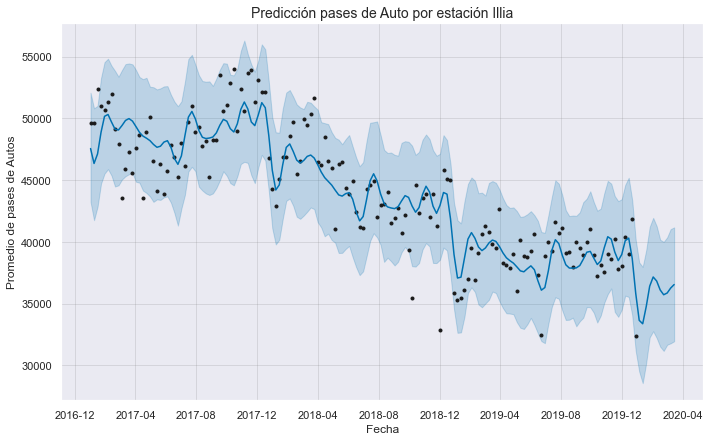

In [66]:
plt.figure(figsize=(20, 12))
semanal_model20.plot(semanal_forecast20, xlabel = 'Fecha', ylabel = 'Promedio de pases de Autos')
plt.title('Predicción pases de Auto por estación Illia', fontsize=14);

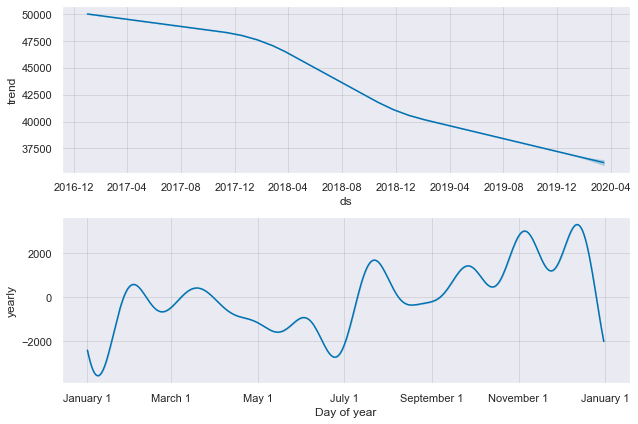

In [67]:
semanal_comp = semanal_model20.plot_components(forecast20)

Similar a nuestro análisis del 2019, el primer trimestre del 2020 mantiene una tendencia negativa en el uso del efectivo como forma de pago. Además, el uso de efectivo también está en su punto más bajo en el mes de enero.

In [68]:
semanal_pred_pro20 = forecast20[(forecast20.ds > "2019-12-29") & (forecast20.ds <= "2020-03-15")]
semanal_pred_pro20 = semanal_pred_pro20.drop(columns=["trend", "yhat_lower", "yhat_upper",
                       "trend_lower", "trend_upper", "additive_terms",
                       "additive_terms_lower", "additive_terms_upper",
                       "yearly", "yearly_lower", "yearly_upper", 
                       "multiplicative_terms", "multiplicative_terms_lower", 
                       "multiplicative_terms_upper"], axis = 1)
semanal_pred_pro20.rename(columns={'ds':'fecha','yhat':'cantidad_pasos'}, inplace=True)
semanal_pred_pro20 = semanal_pred_pro20.set_index('fecha')
semanal_pred_pro20

,cantidad_pasos
fecha,
2020-01-05,33645.430360
2020-01-12,33366.356577
2020-01-19,34747.391252
2020-01-26,36411.707194
2020-02-02,37157.110784
2020-02-09,36827.175510
2020-02-16,36107.411435
2020-02-23,35717.218657
2020-03-01,35857.276869


In [69]:
semanal_obs_20 = semanal_media_c2020[(semanal_media_c2020.index > "2019-12-29") & (semanal_media_c2020.index <= "2020-03-15")]
semanal_obs_20

,cantidad_pasos
fecha,
2020-01-05,30124.600000
2020-01-12,34765.571429
2020-01-19,35259.714286
2020-01-26,34456.000000
2020-02-02,36190.714286
2020-02-09,35306.428571
2020-02-16,37351.142857
2020-02-23,36728.000000
2020-03-01,33641.000000


RMSE en Prophet: 2162.4035892041106


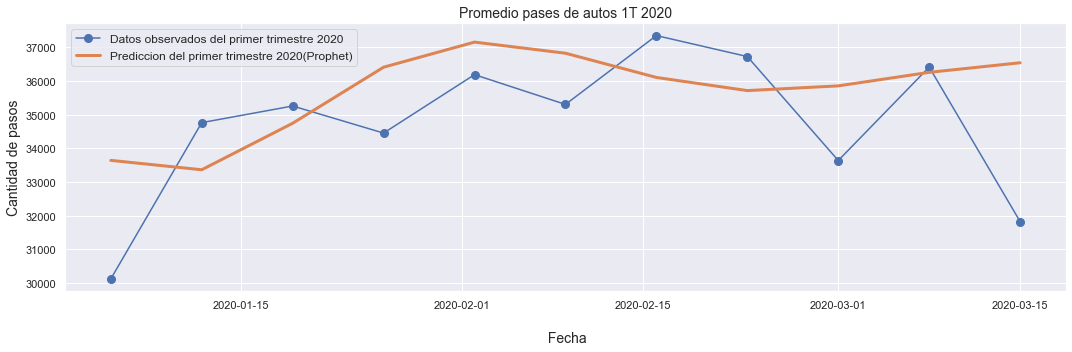

In [70]:
y_pred_prophet20 = semanal_pred_pro20.cantidad_pasos
y_obs20 = semanal_obs_20.cantidad_pasos
rmse_prophet20 = np.sqrt(mean_squared_error(y_obs20,y_pred_prophet20))
print(f'RMSE en Prophet: {rmse_prophet20}')

plt.figure(figsize=(15,5))
plt.plot(semanal_obs_20.index, semanal_obs_20.cantidad_pasos, marker='o', markersize=8, label='Datos observados del primer trimestre 2020')
plt.plot(semanal_pred_pro20.index, semanal_pred_pro20, lw=3, label='Prediccion del primer trimestre 2020(Prophet)')
plt.title ('Promedio pases de autos 1T 2020', fontsize=14)
plt.xlabel('\n Fecha',fontsize=14)
plt.ylabel('Cantidad de pasos',fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## 2.3. LSTM

LSTM es un tipo de red neuronal recurrente que tiene la característica de recordar información pasada por lo cual al momento de predecir valores futuros tiene en cuenta esta información pasada, esto añadido al hecho de que pueden aprender dependencias largas y por tanto tienen una memoria de largo plazo, las hace ideales para trabajar con Series de Tiempo. Entonces, utilizaremos LSTM sobre el dataset estudiado con las variables tiempo y flujo vehicular para evaluar si podemos obtener un error de predicción más cercano a cero.

### 2.3.1. Último Trimestre 2019

In [71]:
dataset = semanal_media.cantidad_pasos.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(128)
test_size = 12
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [72]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [73]:
# reshape a X=t y Y=t+1
look_back = 16
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [74]:
X_train.shape

(111, 16)

In [75]:
X_train.shape

(111, 16)

In [76]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [77]:
X_train.shape

(111, 1, 16)

In [78]:
#creamos la red
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(LSTM(48, input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=10, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

# Training Phase
model.summary()

Epoch 1/20
12/12 [==============================] - 0s 39ms/step - loss: 0.2782 - val_loss: 0.0214
Epoch 2/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0739 - val_loss: 0.0042
Epoch 3/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0225 - val_loss: 0.0080
Epoch 4/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0223 - val_loss: 0.0071
Epoch 5/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0187 - val_loss: 0.0050
Epoch 6/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.0047
Epoch 7/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0191 - val_loss: 0.0049
Epoch 8/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0188 - val_loss: 0.0050
Epoch 9/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0185 - val_loss: 0.0049
Epoch 10/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0184 - val_loss: 0.0047
Epoch 11/20
12/12 

In [79]:
# hacemos nuestas predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invertimos las predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

rmse_train_lstm = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
rmse_test_lstm = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))

print(f'RMSE en Train LSTM: {rmse_train_lstm}')
print(f'RMSE en Test LSTM: {rmse_test_lstm}')

RMSE en Train LSTM: 2895.434517935164
RMSE en Test LSTM: 1474.8415734163493


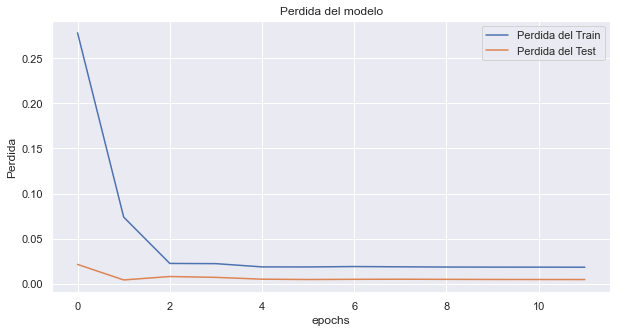

In [80]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Perdida del Train')
plt.plot(history.history['val_loss'], label='Perdida del Test')
plt.title('Perdida del modelo')
plt.ylabel('Perdida')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

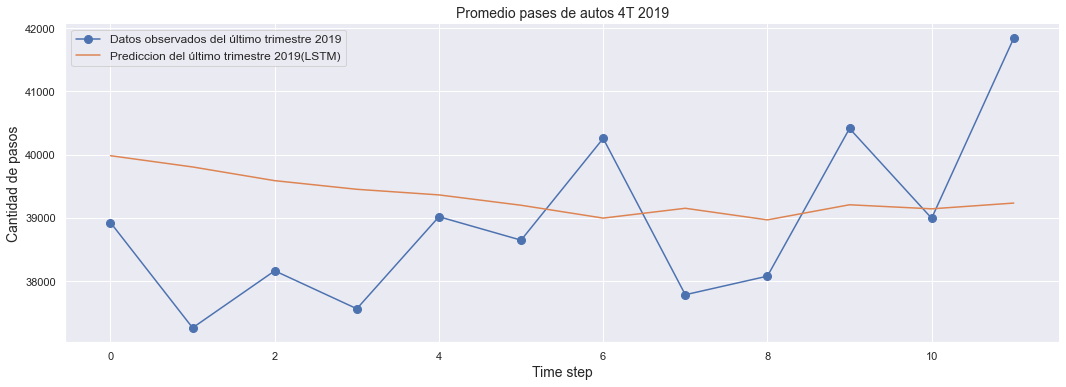

In [81]:
aa=[x for x in range(12)]
plt.figure(figsize=(15,5))
plt.plot(aa, Y_test[0][:200], marker='o', markersize=8, label='Datos observados del último trimestre 2019')
plt.plot(aa, test_predict[:,0][:200], label='Prediccion del último trimestre 2019(LSTM)')
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.title ('Promedio pases de autos 4T 2019', fontsize=14)
plt.ylabel('Cantidad de pasos', size=14)
plt.xlabel('Time step', size=14)
plt.legend(fontsize=12)
plt.show();

Esta red neuronal funciona bien para predecir el último trimestre de 2019 a pesar de su poco complejidad, sin embargo, con Sarima que nuestro modelo Benchmark obtuvimos mejores errores de predicción.

### 2.3.2. Primer Trimestre 2020

In [82]:
dataset_20 = semanal_media_c2020.cantidad_pasos.values #numpy.ndarray
dataset_20 = dataset_20.astype('float32')
dataset_20 = np.reshape(dataset_20, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_20 = scaler.fit_transform(dataset_20)
train_size = int(140)
test_size = 13
train, test = dataset_20[0:train_size,:], dataset_20[train_size:len(dataset_20),:]

In [83]:
def create_dataset(dataset_20, look_back=1):
    X, Y = [], []
    for i in range(len(dataset_20)-look_back-1):
        a = dataset_20[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset_20[i + look_back, 0])
    return np.array(X), np.array(Y)

In [84]:
look_back = 16
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [85]:
X_train.shape

(123, 16)

In [86]:
X_train.shape

(123, 16)

In [87]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [88]:
X_train.shape

(123, 1, 16)

In [89]:
#usamos el mismo modelo que utilizamos para predecir el ultimo trimestre de 2019 con los mismo parámetros
history = model.fit(X_train, Y_train, epochs=20, batch_size=10, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

# Training Phase
model.summary()

Epoch 1/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0146 - val_loss: 0.0240
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.0238
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.0234
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0144 - val_loss: 0.0232
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0144 - val_loss: 0.0230
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.0227
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.0225
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0142 - val_loss: 0.0223
Epoch 9/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0142 - val_loss: 0.0221
Epoch 10/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0141 - val_loss: 0.0219
Epoch 11/20
13/13 [

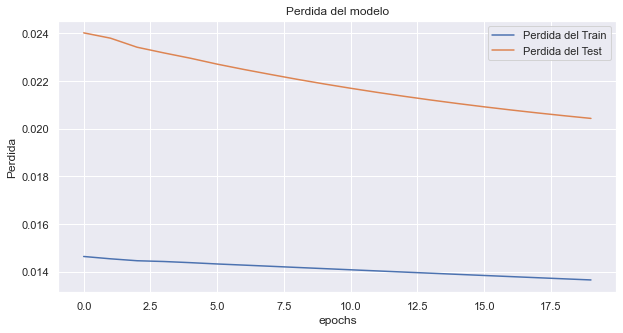

In [90]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Perdida del Train')
plt.plot(history.history['val_loss'], label='Perdida del Test')
plt.title('Perdida del modelo')
plt.ylabel('Perdida')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [91]:
test_predict = model.predict(X_test)


test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

rmse_test_lstm_20 = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))

print(f'RMSE en Test LSTM: {rmse_test_lstm_20}')

RMSE en Test LSTM: 3409.337318756602


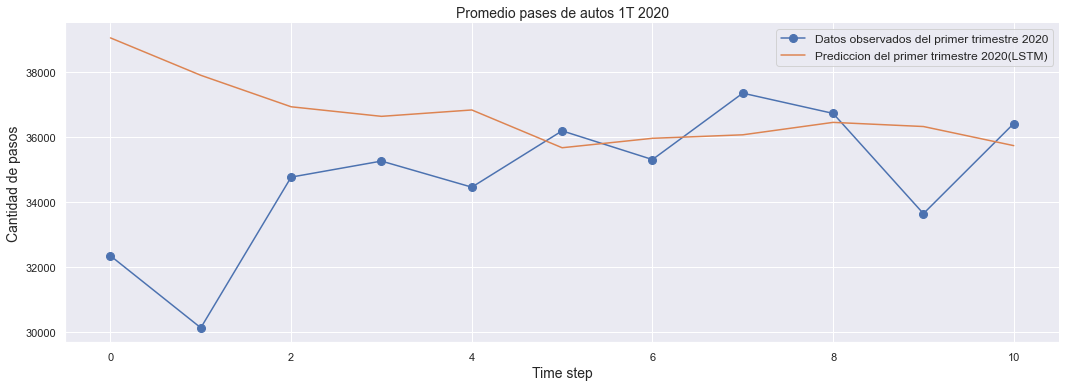

In [92]:
aa2=[x for x in range(11)]
plt.figure(figsize=(15,5))
plt.plot(aa2, Y_test[0][:200], marker='o', markersize=8, label='Datos observados del primer trimestre 2020')
plt.plot(aa2, test_predict[:,0][:200], label='Prediccion del primer trimestre 2020(LSTM)')
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.title ('Promedio pases de autos 1T 2020', fontsize=14)
plt.ylabel('Cantidad de pasos', size=14)
plt.xlabel('Time step', size=14)
plt.legend(fontsize=12)
plt.show();

Podemos concluir que si bien esta red neuronal funciona bien para predecir el último trimestre de 2019 no funciona bien para predecir el primer trimrestre del 2020. Probablemente, complejizar la red neuronal podríamos conseguir mejores resultados de predicción y con menos pérdida en el Test.

## 3. Conclusiones

### 3.1. Comparación de modelos

#### 3.1.1 2019

In [93]:
list_scores = [rmse_sarima, rmse_prophet, rmse_test_lstm]
list_regressors = ['Sarima', 'Prophet', 'LSTM']

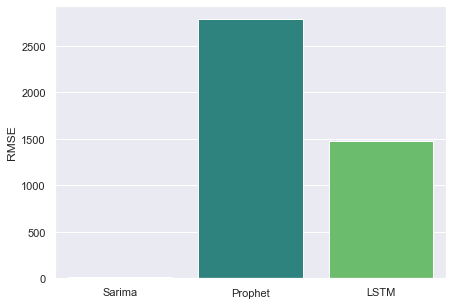

In [94]:
fig, ax = plt.subplots()
fig.set_size_inches(7,5)
sns.barplot(x=list_regressors, y=list_scores, ax=ax, palette = 'viridis')
plt.ylabel('RMSE')
plt.show()

El mejor modelo para predecir el primer trimestre del 2019 es, sin duda el SARIMA pues fue el que nos dio el menor error de predicción. Le sigue el LSTM que a pesar de que se comporta bien no supera el desempeño del SARIMA. El modelo de Prophet no se comporta tan bien como los otros modelos.

#### 3.1.2. 2020

In [95]:
list_scores_20 = [rmse_sarima20, rmse_prophet20, rmse_test_lstm_20 ]
list_regressors_20 = ['Sarima', 'Prophet', 'LSTM']

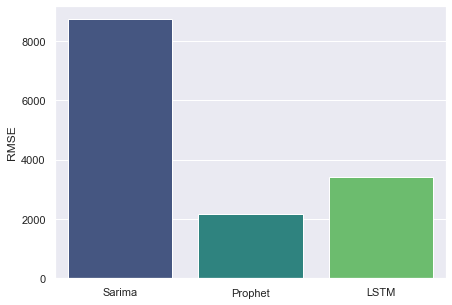

In [96]:
fig, ax = plt.subplots()
fig.set_size_inches(7,5)
sns.barplot(x=list_regressors_20, y=list_scores_20, ax=ax, palette = 'viridis')
plt.ylabel('RMSE')
plt.show()

Para el caso del primer trimestre del 2020, podemos ver que esta vez es el modelo de Prophet es el que mejor se desempeña pues nos da el menor error de predicción. Sabemos que prophet se adapta muy bien a cambios drásticos de tendencia y la presencia de outliers lo que puede haber influido en predecir con más precisión el 1T del 2020. Después podemos ver como SARIMA no se desempeña muy bien comparado a los otros modelos.

### 3.2. Conclusiones Generales

De nuestro revisión de esta dataset, incluyendo 2020, podemos concluir que el uso del efectivo como forma de pago más usada para pagar los peajes AUSA está cayendo marcando su caída en la estación Illia desde el 2019 y em todas las estaciones desde el 2018. Más allá de eso, consideramos que esta tendencia no se va a revertir tomando en cuenta la aparición del Coronavirus que no solo afecta a nivel de la reducción del tránsito por el aislamiento pero también afecta el uso del efectivo para evitar la transmisión del virus así como también está el hecho de que la economía argentina es una economía inflacionaria con lo cual el efectivo va ir siendo reemplazado por mecanismos digitales a medida que la inflación haga necesario el uso de más billetes para pagar el peaje en este caso.